In [14]:
#!/usr/bin/env python3
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
def pointgrav2d(t, coords, GM):    
    """Returns acceleration from gravity"""
    
    x     = coords[0:2]
    r     = np.linalg.norm(x)

    rhat = (
            + x 
            / r
           )
    ag   = (
            - GM 
            / r**2 
            * rhat
           )
    return np.concatenate((coords[2:4], ag))
 

In [16]:
def main():
    mpl.rc('font', size=18)
    # Impact parameter, b
    b       = 3
    M, R, G = 1, 1, 1

    vesc    = np.sqrt(2 * G * M / R)
    vrel    = vesc / 2 * np.asarray((1  , 0)) 

    fig, ax = plt.subplots(figsize=(9, 9)) 
    

    bscat = R * (np.linalg.norm(vesc)/np.linalg.norm(vrel))**2
    bcoll = R * np.sqrt(1 + (np.linalg.norm(vesc) / np.linalg.norm(vrel))**2)

    barr   = np.array((bcoll, bscat, 2*bscat))

    blabel = ("$b_{coll}$", "$b_{scat}$", "$2 b_{scat}$")

    for label, b in zip(blabel,barr):
        # Initial conditions
        x0      = np.asarray((-10, b))
        y0      = np.concatenate((x0, vrel))
    
        #dynamical timescale
        dynt = 2*b / np.linalg.norm(vrel)

        ntimestep = 10000
        tstart, tstop = 0, 5 * dynt

        t = np.linspace(tstart, tstop, ntimestep)


        sol = solve_ivp(pointgrav2d, [tstart, tstop], y0, t_eval=t, args=(G*M, ))

        ax.plot(sol.y[0], sol.y[1], label=label, linewidth=3)

    circle = plt.Circle((0,0), R, color="red", label="Deflector")
    ax.add_patch(circle)

    ax.legend()

    # Length scale of inteterest ~b
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

    ax.set_xlabel("x / R")
    ax.set_ylabel("y / R")

    return fig, ax

(<Figure size 900x900 with 1 Axes>, <Axes: xlabel='y / R'>)

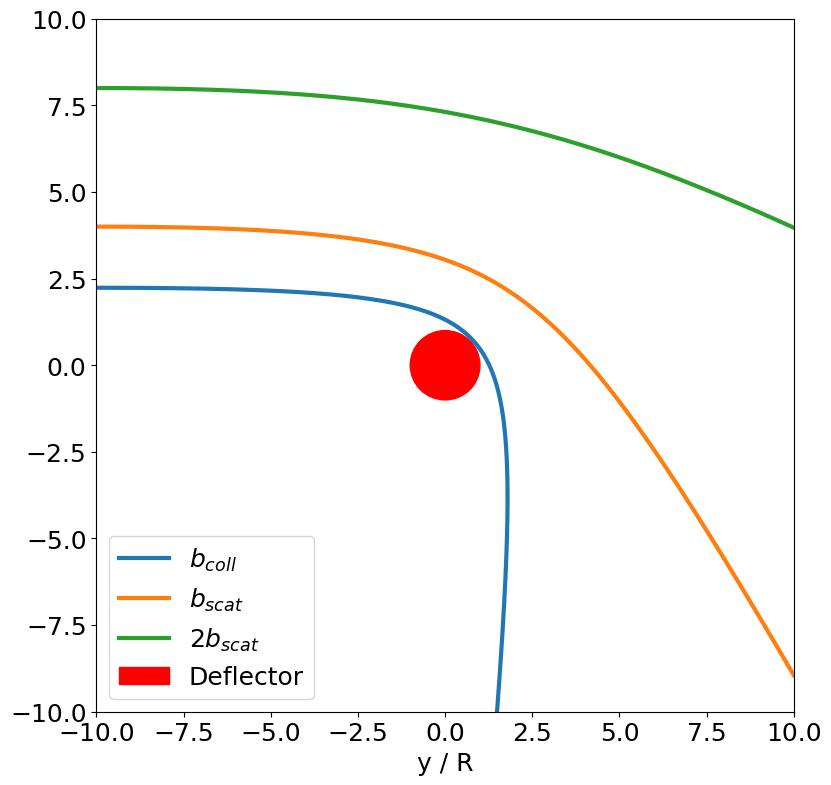

In [17]:
main()